 # Funciones auxiliares en OpenCV-python
 Se listan a continuación algunas funciones comunes de OpenCV y otras que las complementan. En general, la implementación de OpenCV es más eficiente que las de otras librerías de python, por lo que se prefiere por ejemplo para el cálculo de transformaciones, histogramas, etc. Algunas de estas funciones están implementadas en pdifun.py

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
print("Python version "+cv.__version__)

# El módulo PDIFUN esta subido al moodle y tiene algunas funciones que simplifican el uso de filtros en frecuencia.
import pdifun



Python version 4.9.0


## Transformada Discreta de Fourier (DFT)

(307, 442)


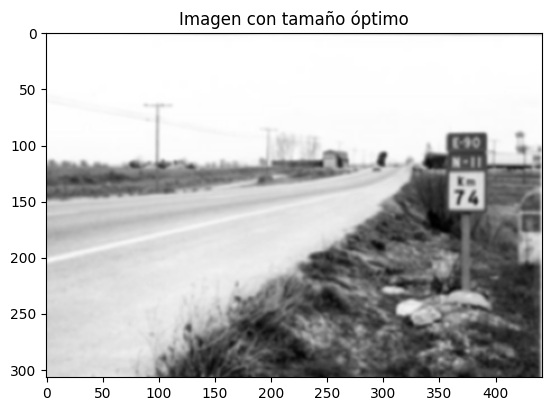

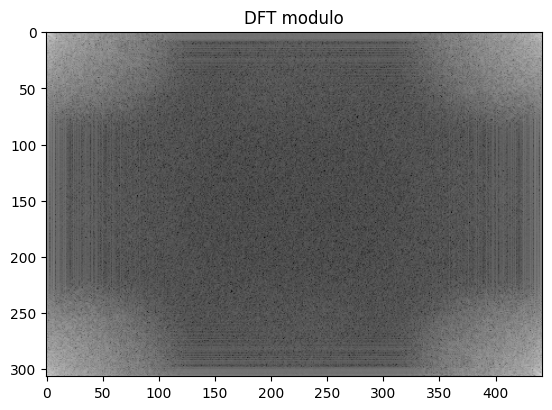

In [2]:
img1=cv.imread("camino.tif",cv.IMREAD_GRAYSCALE)
img2=cv.imread("venn.png")

# Tamaño óptimo de la imágen para el mejor rendimiento de la DFT. 
# Si la velocidad es un requerimiento, se agregan ceros (zero-padding) a la imagen. 
#img1=pdifun.optimalDFTImg(img1)
print(img1.shape)
plt.figure()
plt.imshow(img1,cmap='gray')
plt.title("Imagen con tamaño óptimo")

# dft devuelve la componente real e imaginaria en 2 canales:
imgf=cv.dft(np.float32(img1),flags=cv.DFT_COMPLEX_OUTPUT) 
# a partir de lo cual se puede obtener el módulo
modulo = 20*np.log(cv.magnitude(imgf[:,:,0],imgf[:,:,1]))
plt.figure()
plt.imshow(modulo,cmap='gray')
plt.title("DFT modulo")
plt.show()

Para facilitar la visualización centramos el módulo en la imagen. La función fftshift del módulo numpy.fft invierte los cuadrantes de la transformada, de forma tal que el punto (0,0) queda en la posición (alto/2,ancho/2)

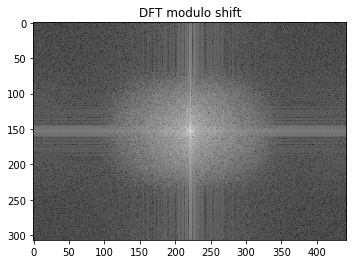

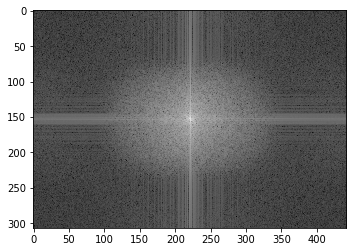

In [14]:
moduloshift = np.fft.fftshift(modulo) 
plt.figure()                    
plt.imshow(moduloshift,cmap='gray')
plt.title("DFT modulo shift")
plt.show()


# esto está implementado en pdifun
pdifun.spectrum(img1)


### Filtro en dominio frecuencial

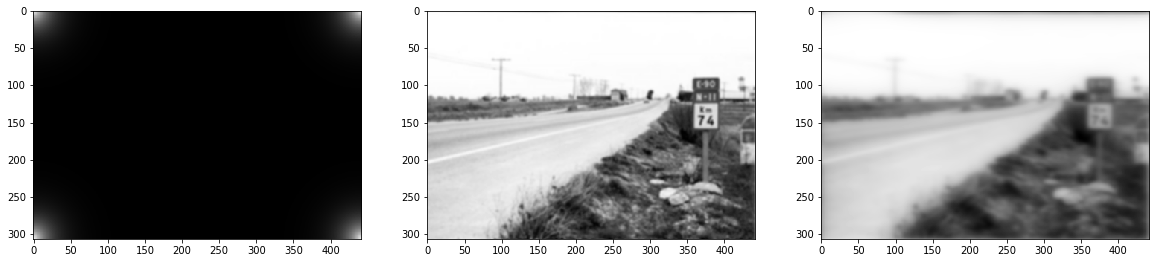

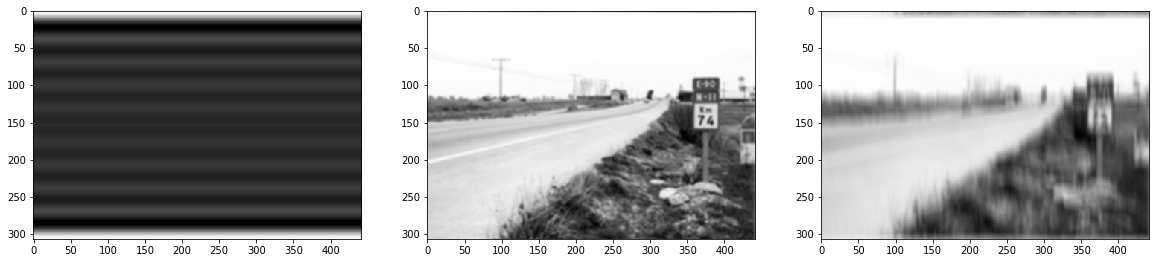

In [21]:
filterG=pdifun.filterGaussian(img1.shape[0],img1.shape[1],.01)

filter_vertical=pdifun.motionBlur((img1.shape[0],img1.shape[1]),0,-10)


img6=pdifun.filterImg(img1,filterG)
img7=pdifun.filterImg(img1,filter_vertical)


plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(filterG,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img1,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img6,cmap='gray')

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(filter_vertical,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img1,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img7,cmap='gray')


plt.show()
